# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix



## Read Data

In [2]:
df_mcc= pd.read_csv('dollar_tree-231012-200322.csv')
df_mcc

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [3]:
# Display basic information about the dataset
df_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [4]:
# Display descriptive statistics of the numerical columns
df_mcc.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [5]:
# check for missing values
df_mcc.isnull()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
34865,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


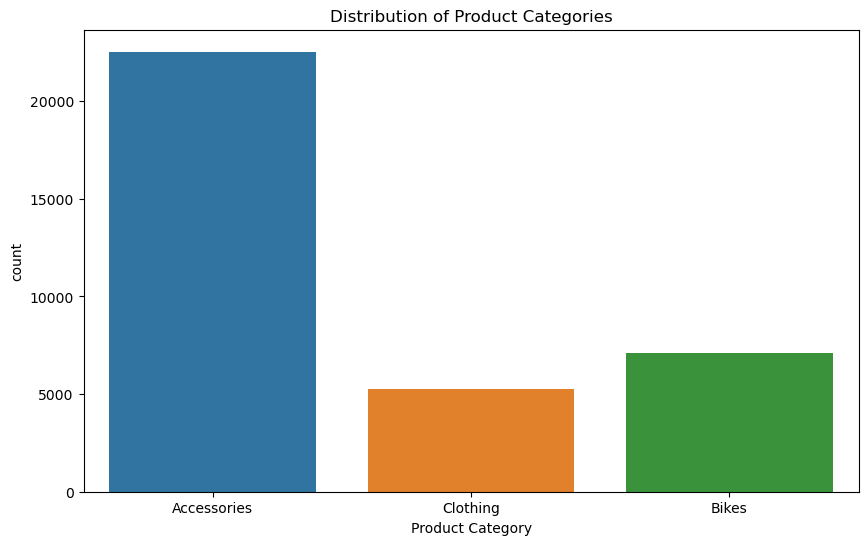

In [6]:
# Visualize the distribution of the target variable (product_category)
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=df_mcc)
plt.title('Distribution of Product Categories')
plt.show()

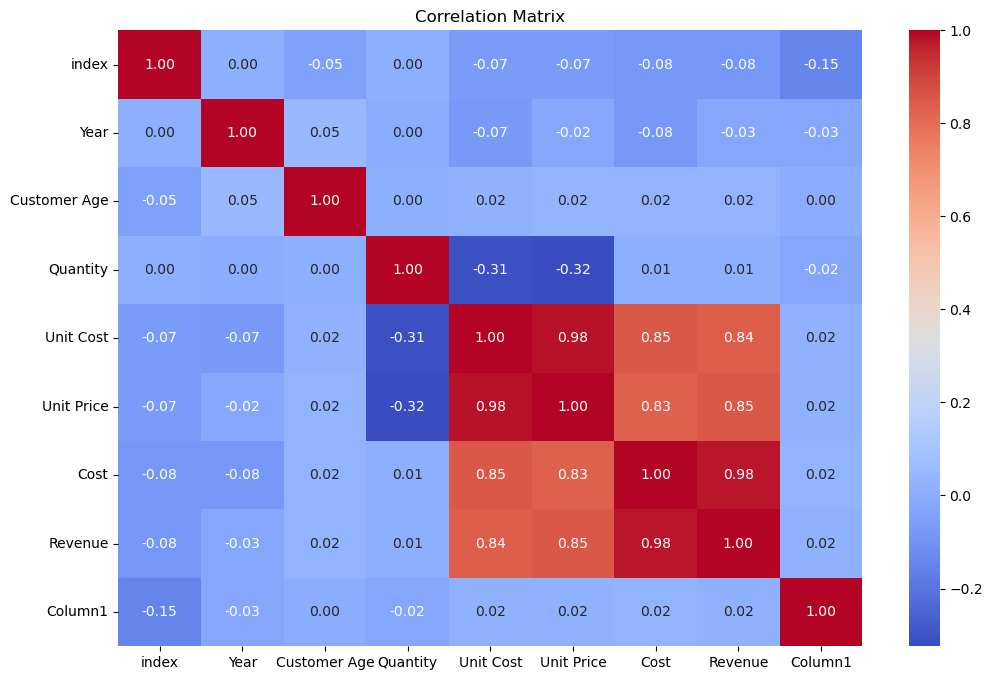

In [7]:
correlation_matrix = df_mcc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# `Data Preparation`

## Data Cleaning

In [8]:
# Check for missing values
df_mcc.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [9]:
# Remove rows with missing values
df_mcc.dropna(inplace= True)
df_mcc.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Column1             0
dtype: int64

In [10]:
# checking for duplicates
df_mcc.duplicated().any()

False

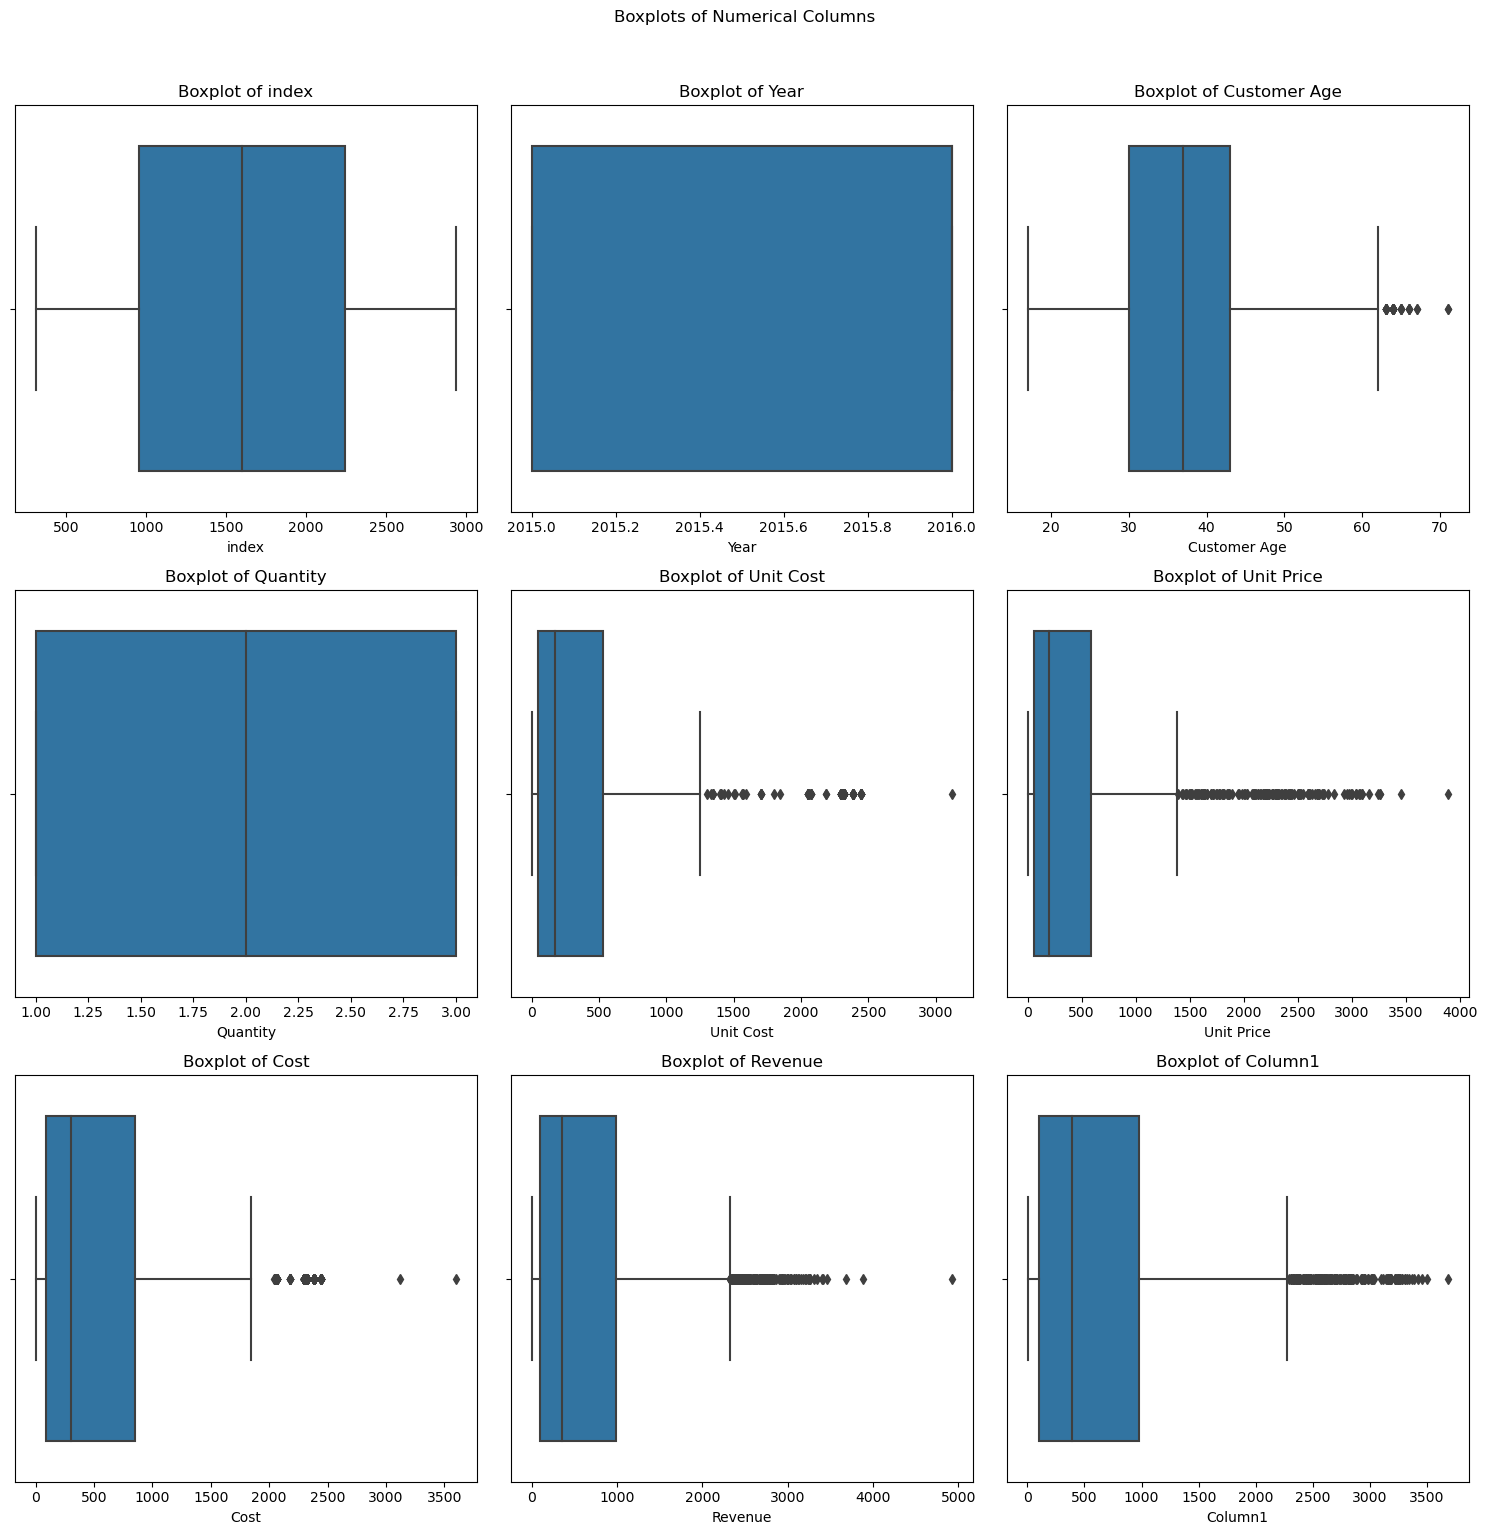

In [11]:
# Get a list of numerical columns
numerical_columns = df_mcc.select_dtypes(include=['float64', 'int64']).columns


# Determine the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.suptitle('Boxplots of Numerical Columns', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create individual box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_mcc[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove empty subplots if there are any
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# # Visualize box plots for numerical columns in searching for outliers
# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x=df_mcc[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

In [12]:
# Drop the 'Column1' and 'Cost' columns
columns_to_drop = ['Column1', 'Cost', 'index','Year', 'Month']
df_mcc.drop(columns=columns_to_drop, inplace=True)
df_mcc

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
312,1/11/2016,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.00,790.0,2370.0
313,1/11/2016,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.50,199.0,398.0
314,1/18/2016,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.00,1511.5,3023.0
315,1/18/2016,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.00,147.0,294.0
316,1/18/2016,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.00,167.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...
2881,1/5/2016,28.0,M,United Kingdom,England,Accessories,Fenders,2.0,176.00,229.0,458.0
2882,1/7/2016,28.0,M,United Kingdom,England,Accessories,Fenders,1.0,506.00,590.0,590.0
2883,2/20/2016,28.0,M,United Kingdom,England,Accessories,Fenders,3.0,117.33,159.0,477.0
2884,2/24/2016,28.0,M,United Kingdom,England,Accessories,Fenders,1.0,286.00,390.0,390.0


Reasons for dropping the colums are
1. the index it duplicates the default DataFrame index and does not provide any additional information
2. cloumn1 suggests lack of clarity or meaningful information. the data in it is not relevant, contains lot of missing dfata
3. Cost could always be cacluted from quantity and unit  cost
4. Year and Month could always be derived from date

## Divide data into input and output

In [13]:
# Separate features (x) and target variable (y)
X = df_mcc.drop(columns=['Product Category'])  # Features
y = df_mcc['Product Category']  # Target

In [14]:
X

,Date,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
312,1/11/2016,40.0,M,France,Yveline,Road Bikes,3.0,567.00,790.0,2370.0
313,1/11/2016,40.0,M,France,Yveline,Helmets,2.0,192.50,199.0,398.0
314,1/18/2016,40.0,M,France,Yveline,Mountain Bikes,2.0,1160.00,1511.5,3023.0
315,1/18/2016,40.0,M,France,Yveline,Bottles and Cages,2.0,115.00,147.0,294.0
316,1/18/2016,40.0,M,France,Yveline,Bottles and Cages,1.0,140.00,167.0,167.0
...,...,...,...,...,...,...,...,...,...,...
2881,1/5/2016,28.0,M,United Kingdom,England,Fenders,2.0,176.00,229.0,458.0
2882,1/7/2016,28.0,M,United Kingdom,England,Fenders,1.0,506.00,590.0,590.0
2883,2/20/2016,28.0,M,United Kingdom,England,Fenders,3.0,117.33,159.0,477.0
2884,2/24/2016,28.0,M,United Kingdom,England,Fenders,1.0,286.00,390.0,390.0


In [15]:
y

312           Bikes
313     Accessories
314           Bikes
315     Accessories
316     Accessories
           ...     
2881    Accessories
2882    Accessories
2883    Accessories
2884    Accessories
2935       Clothing
Name: Product Category, Length: 2574, dtype: object

## Encoding

### 1. Encode the target column (the labels)


In [16]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable (y)
y_encoded = label_encoder.fit_transform(y)

# Display the encoded target variable
y_encoded

array([1, 0, 1, ..., 0, 0, 2])

### 2. Encode categorical columns

In [17]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['Date', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']
for column in categorical_columns:
    df_mcc[column] = label_encoder.fit_transform(df_mcc[column])
df_dt_new=df_mcc.drop(columns=['Product Category'])

# Display the DataFrame with encoded categorical columns
df_dt_new


,Date,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
312,4,40.0,1,0,28,11,3.0,567.00,790.0,2370.0
313,4,40.0,1,0,28,7,2.0,192.50,199.0,398.0
314,13,40.0,1,0,28,10,2.0,1160.00,1511.5,3023.0
315,13,40.0,1,0,28,2,2.0,115.00,147.0,294.0
316,13,40.0,1,0,28,2,1.0,140.00,167.0,167.0
...,...,...,...,...,...,...,...,...,...,...
2881,32,28.0,1,2,5,5,2.0,176.00,229.0,458.0
2882,35,28.0,1,2,5,5,1.0,506.00,590.0,590.0
2883,146,28.0,1,2,5,5,3.0,117.33,159.0,477.0
2884,151,28.0,1,2,5,5,1.0,286.00,390.0,390.0


### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [18]:
# Assign df_encoded back to df_dt
df_cat=df_dt_new
# Reset indices of DataFrame df_dt
df_cat.reset_index(drop=True, inplace=True)

df_cat

,Date,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
0,4,40.0,1,0,28,11,3.0,567.00,790.0,2370.0
1,4,40.0,1,0,28,7,2.0,192.50,199.0,398.0
2,13,40.0,1,0,28,10,2.0,1160.00,1511.5,3023.0
3,13,40.0,1,0,28,2,2.0,115.00,147.0,294.0
4,13,40.0,1,0,28,2,1.0,140.00,167.0,167.0
...,...,...,...,...,...,...,...,...,...,...
2569,32,28.0,1,2,5,5,2.0,176.00,229.0,458.0
2570,35,28.0,1,2,5,5,1.0,506.00,590.0,590.0
2571,146,28.0,1,2,5,5,3.0,117.33,159.0,477.0
2572,151,28.0,1,2,5,5,1.0,286.00,390.0,390.0


# `Modeling`

In [19]:
y= y_encoded
y

array([1, 0, 1, ..., 0, 0, 2])

In [20]:
X= df_cat
X

,Date,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
0,4,40.0,1,0,28,11,3.0,567.00,790.0,2370.0
1,4,40.0,1,0,28,7,2.0,192.50,199.0,398.0
2,13,40.0,1,0,28,10,2.0,1160.00,1511.5,3023.0
3,13,40.0,1,0,28,2,2.0,115.00,147.0,294.0
4,13,40.0,1,0,28,2,1.0,140.00,167.0,167.0
...,...,...,...,...,...,...,...,...,...,...
2569,32,28.0,1,2,5,5,2.0,176.00,229.0,458.0
2570,35,28.0,1,2,5,5,1.0,506.00,590.0,590.0
2571,146,28.0,1,2,5,5,3.0,117.33,159.0,477.0
2572,151,28.0,1,2,5,5,1.0,286.00,390.0,390.0


In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [23]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[320,   0,   0],
       [  0, 114,   0],
       [  0,   0,  81]], dtype=int64)

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[320   0   0]
 [  0 114   0]
 [  0   0  81]]


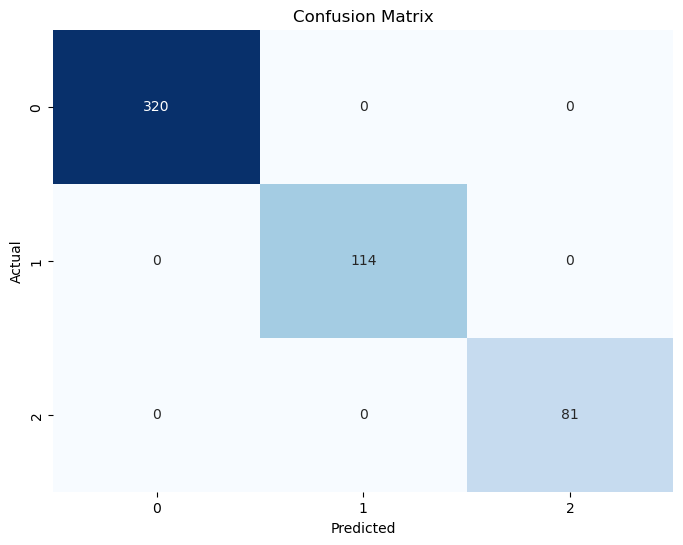

In [32]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Build a classification Report

In [31]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print(df_report)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0    320.0
1                   1.0     1.0       1.0    114.0
2                   1.0     1.0       1.0     81.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    515.0
weighted avg        1.0     1.0       1.0    515.0
